# Playground

## 1. Dense Trajectories   
Dense trajectories is a method for object detection and action recognition in videos. It was first proposed by Wang et al. in their 2011 paper "Dense Trajectories" and was used to achieve state-of-the-art results on several benchmark datasets at the time.

The method steps:
1. Applies a dense sampling of trajectories to describe the motion and appearance of objects in a video. These trajectories are represented as a set of points in space-time, and are computed by densely sampling points on the object's contour and tracking them through the video using the optical flow.
2. Represent the trajectories by a set of local spatio-temporal features such as histograms of oriented gradients (HOG), histograms of optical flow (HOF), and motion boundary histograms (MBH).
3. Train a classifier (e.g. linear SVM) to detect objects in the video.

### Step 1: Extract dense trajectories for each frame   
1. reads in a video
2. converts the frames to grayscale
3. For each frame 
    - Computes the dense optical flow using the Farneback method
    - Feach cell in the frame
        - Checks if the flow for that cell is within the motion boundary
        - If YES, it draws a line segment to represent the trajectory
        
The resulting image will show the trajectories of the objects in the video.

#### Flow on 2 frames

Text(0.5, 1.0, 'Next frame')

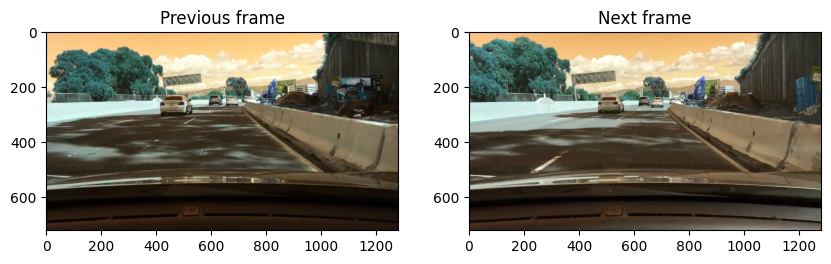

In [ ]:
prev = cv2.imread('test/001.jpg')
prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)

next_img = cv2.imread('test/004.jpg')
next_gray = cv2.cvtColor(next_img, cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(prev=prev_gray, next=next_gray, flow=None, pyr_scale=0.6, levels=10, winsize=5, iterations=10, poly_n=5, poly_sigma=1.2, flags=0)
flow.shape

fig, ax = plt.subplots(1,2,figsize=(10, 8))
ax[0].imshow(prev)
ax[0].set_title('Previous frame')
ax[1].imshow(next_img)
ax[1].set_title('Next frame')

In [ ]:
X, Y = np.meshgrid(np.arange(0, 719, 20), np.arange(1279, -1, -20))

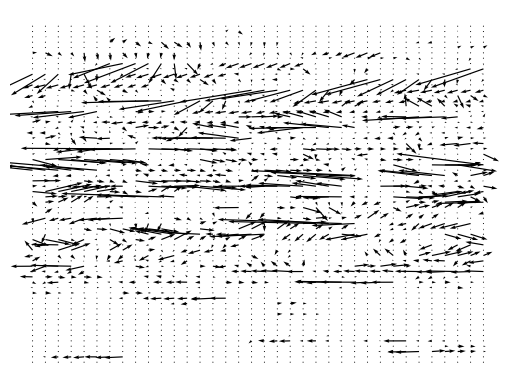

In [ ]:
plt.quiver(X, Y, flow[::20, ::20, 0], flow[::20, ::20, 1])
plt.axis('off');

In [ ]:
mask = np.zeros_like(prev)
  
# Sets image saturation to maximum
mask[..., 1] = 255

#plt.imshow(mask)

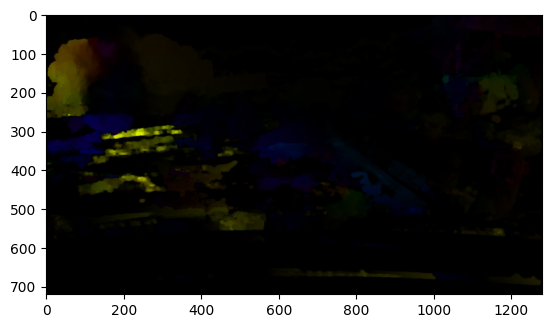

In [ ]:
# Computes the magnitude and angle of the 2D vectors
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    
# Sets image hue according to the optical flow 
# direction
mask[..., 0] = angle * 180 / np.pi / 2
    
# Sets image value according to the optical flow
# magnitude (normalized)
mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    
# Converts HSV to RGB (BGR) color representation
rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    
# Opens a new window and displays the output frame
plt.imshow(rgb)

#### Flow on Video

In [ ]:
# The video feed is read in as
# a VideoCapture object
cap = cv2.VideoCapture("./videos/train_B_raw.avi")
  
# ret = a boolean return value from
# getting the frame, first_frame = the
# first frame in the entire video sequence
ret, first_frame = cap.read()
  
# Converts frame to grayscale because we
# only need the luminance channel for
# detecting edges - less computationally 
# expensive
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
  
# Creates an image filled with zero
# intensities with the same dimensions 
# as the frame
mask = np.zeros_like(first_frame)
  
# Sets image saturation to maximum
mask[..., 1] = 255
  
while(cap.isOpened()):
      
    # ret = a boolean return value from getting
    # the frame, frame = the current frame being
    # projected in the video
    ret, frame = cap.read()
    if not ret:
        break
      
    # Opens a new window and displays the input
    # frame
    cv2.imshow("input", frame)
      
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      
    # Calculates dense optical flow by Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev=prev_gray, next=gray, flow=None, pyr_scale=0.8, levels=3, winsize=15, iterations=3, poly_n=5, poly_sigma=1.1, flags=0)
                                       #0.5, 3, 15, 3, 5, 1.2, 0)
      
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
      
    # Sets image hue according to the optical flow 
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
      
    # Converts HSV to RGB (BGR) color representation
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
      
    # Opens a new window and displays the output frame
    cv2.imshow("dense optical flow", rgb)
      
    # Updates previous frame
    prev_gray = gray
      
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# The following frees up resources and
# closes all windows
cap.release()
cv2.destroyAllWindows()

### Step n°2: Extract HOG/HOF features from the trajectories   
After extracting the dense trajectories from the video as I described in my previous message, the next step would be to extract spatio-temporal features from the trajectories. These features can be used to represent the motion and appearance of objects in the video.

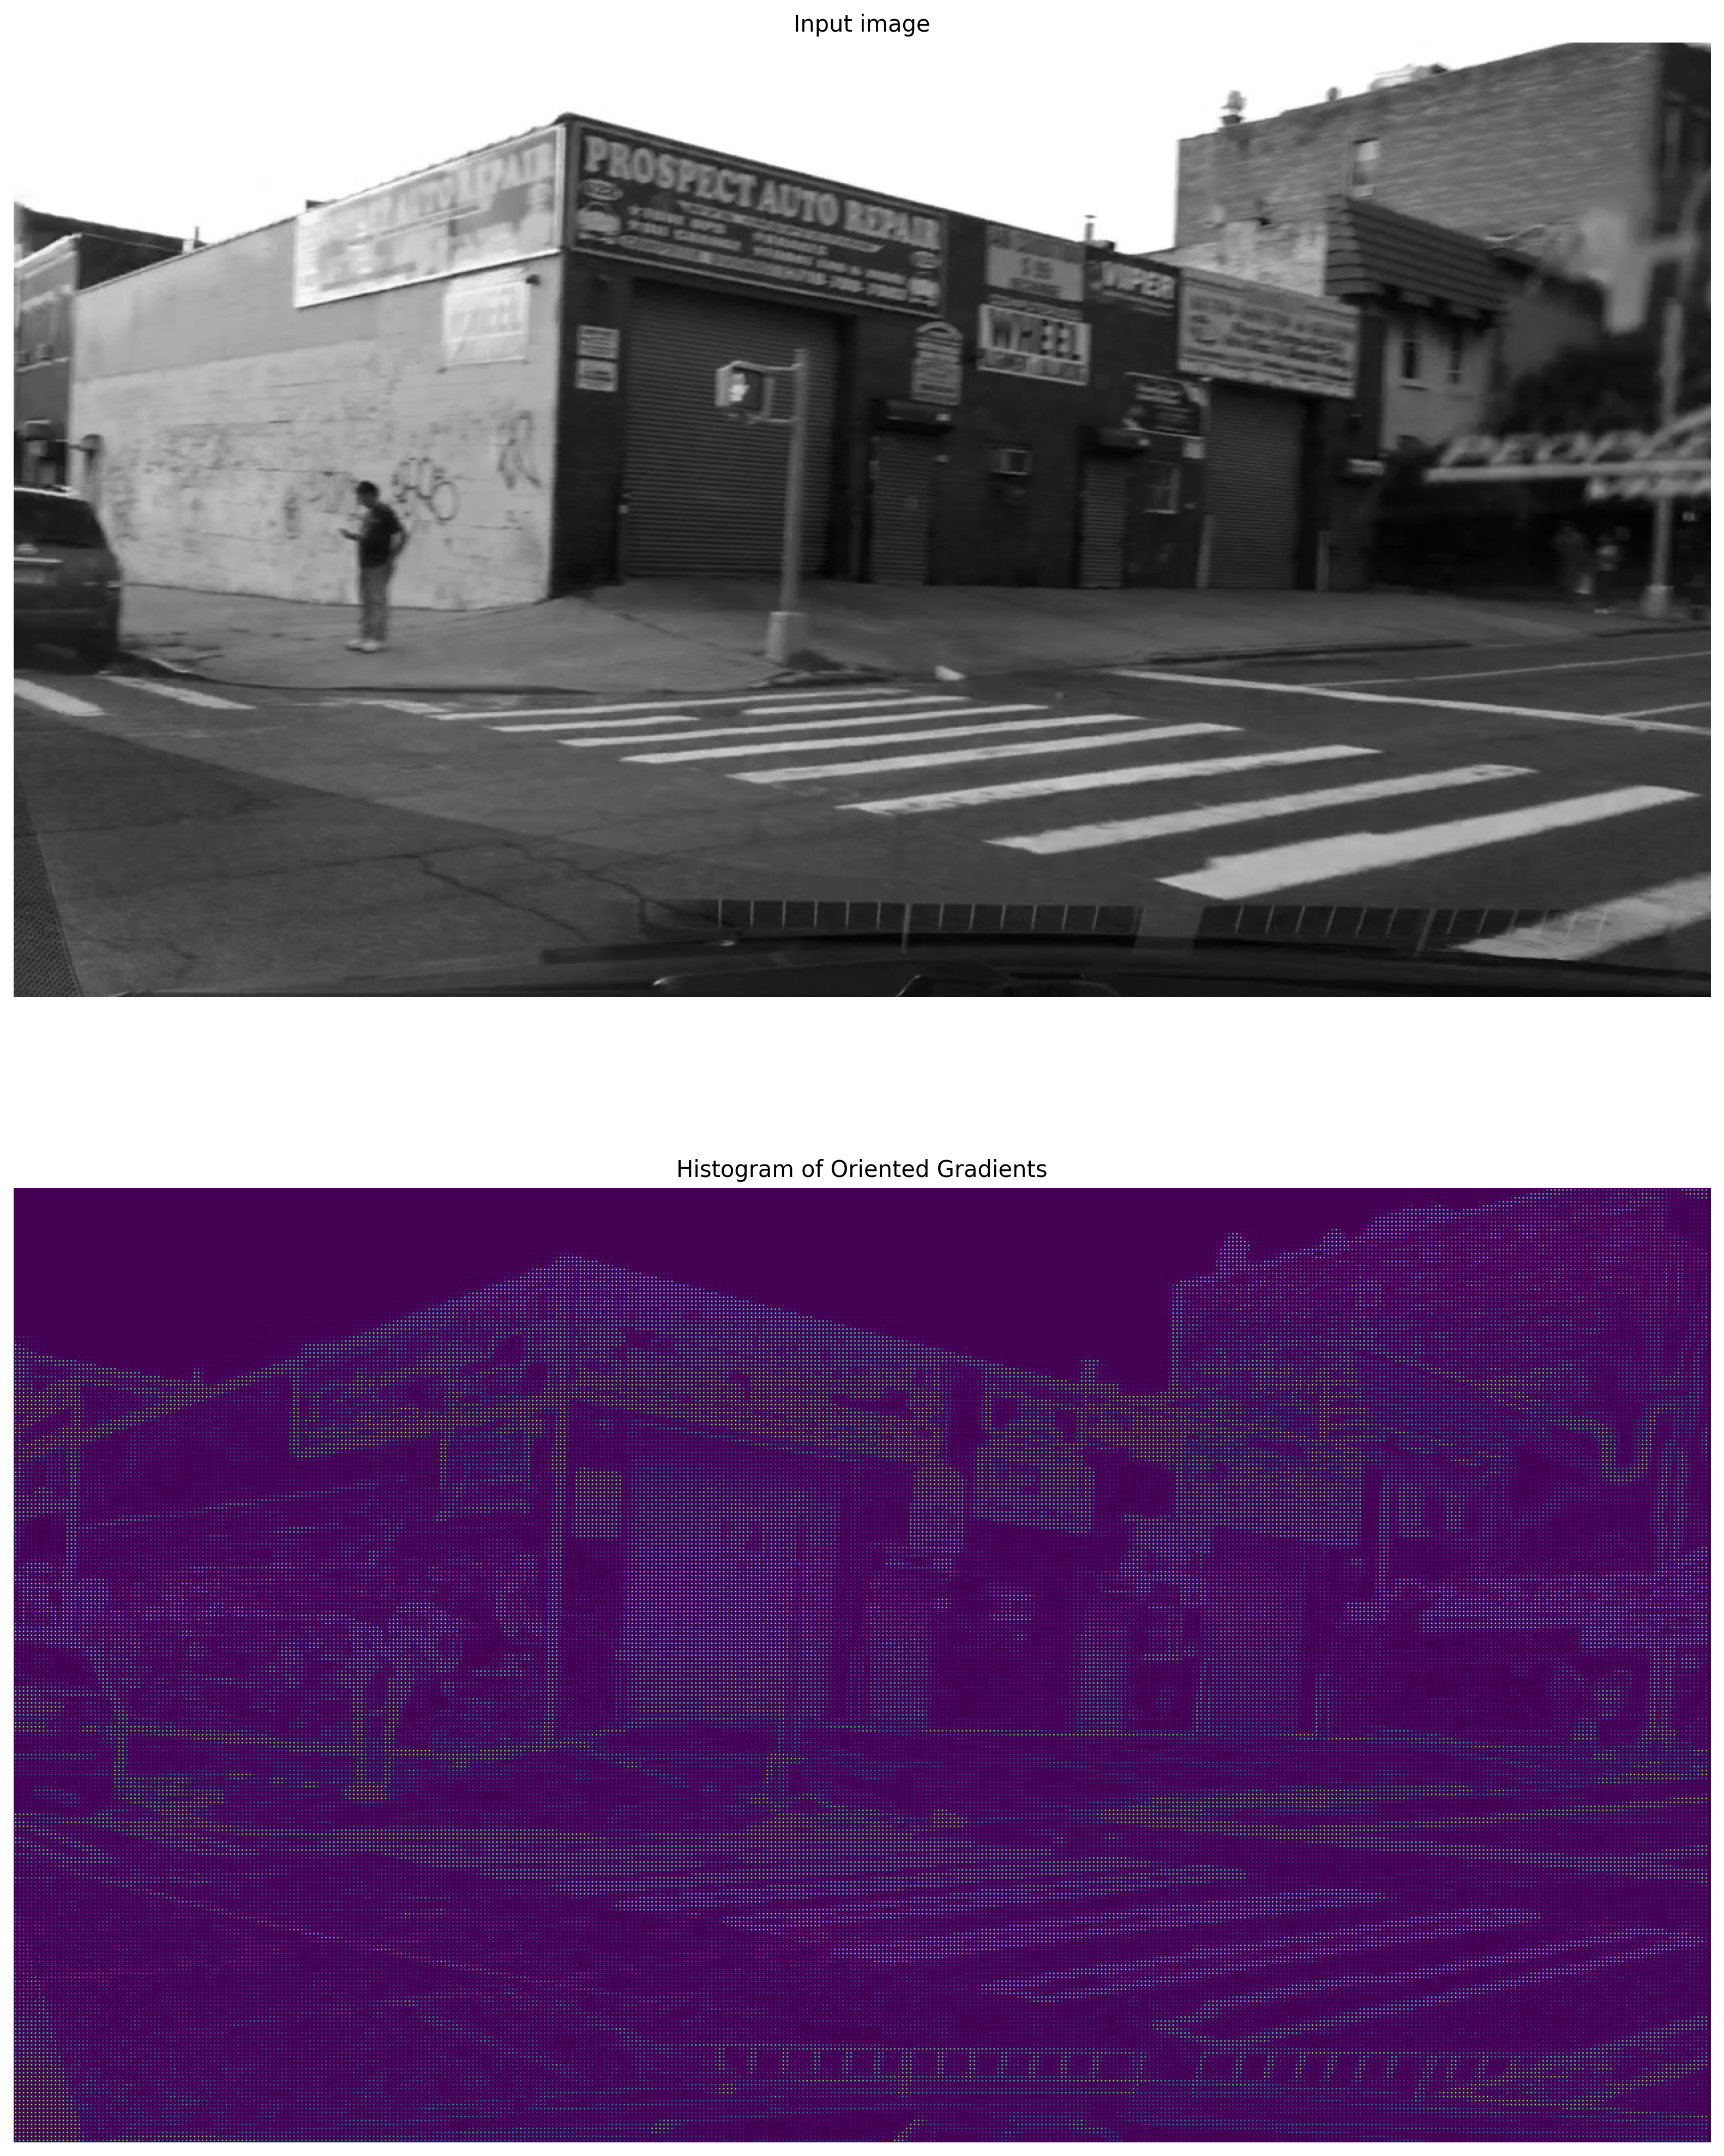

In [ ]:
# -------------------------------------------------------------------------------- #
# Title: HOG Feature Extraction
# -------------------------------------------------------------------------------- #

image = cv2.imread('./train/B_191.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fd, hog_image = hog(gray, orientations=12, pixels_per_cell=(3,3),cells_per_block=(3, 3), visualize=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20), sharex=True, sharey=True,dpi=250)

ax1.axis('off')
ax1.imshow(gray,cmap='gray')
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 15))

ax2.axis('off')
ax2.imshow(hog_image_rescaled)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Code uses the HOGDescriptor and HOFDescriptor classes from OpenCV to compute the HOG and HOF features respectively. It takes the dense trajectories image as input and returns a feature vector.

(Idea: HOG, HOF and MBH are not the only features to test; test SIFT, SURF, color histograms also)

### Step n°3: Train a classifier

In [ ]:
# ---------- SVC Classifier ----------#
from sklearn.svm import LinearSVC

# Concatenate the HOG and HOF features
features = np.concatenate((hog_features, hof_features), axis=1)

# Define the labels
labels = np.array([1, 1, 1, ..., 0, 0, 0]) # 1 for vehicle and 0 for non-vehicle

# Create and train the SVM classifier
clf = LinearSVC()
clf.fit(features, labels)

## 2. Discriminative Correlation Filter (DCF)   

Method steps:
1. Compute Dense Trajectories: Extract dense trajectories from the video frames of the train dataset. Dense trajectories are a set of points in the video that capture the motion and appearance of objects in the video.

2. Extract Features: Extract features such as Histograms of Oriented Gradients (HOG) and Histograms of Optical Flow (HOF) from the dense trajectories. These features can be used to represent the motion and appearance of objects in the video.

3. Train Classifier: Train a classifier such as a linear SVM or Random Forest on the features and the bounding boxes coordinates of the train dataset.

4. Apply the classifier on the test dataset: Apply the trained classifier to the test dataset video frames, and use the predicted labels to detect objects in the video.

5. Compute Correlation Filters: Use the Discriminative Correlation Filters (DCF) to track the detected objects in the test dataset video frames. DCF is a popular method for object tracking in videos, which is based on the idea of training a classifier to distinguish the object of interest from the background.

6. Draw Bounding Boxes: Use the tracking results from the DCF to draw bounding boxes around the detected objects in the test dataset video frames.


### Step n°1: Compute Dense Trajectories

In [ ]:
# Define the parameters for the dense trajectories algorithm
params = dict(feature_size=32, 
              scale_step=1.05, 
              min_distance=3, 
              block_size=3)

# Create the dense trajectories object
dt = cv2.createOptFlow_DenseTrajectories(**params)

# Read the video
cap = cv2.VideoCapture("/train_A_raw.avi")

# Initialize the variables
ret, prev = cap.read()
prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)

# Compute the dense trajectories
while True:
    ret, curr = cap.read()
    if not ret:
        break
    curr_gray = cv2.cvtColor(curr, cv2.COLOR_BGR2GRAY)
    dense_trajectories = dt.compute(prev_gray, curr_gray)
    prev_gray = curr_gray

# Release the video capture object
cap.release()

AttributeError: module 'cv2' has no attribute 'createOptFlow_DenseTrajectories'

### Step n°2: Extract Features

### Step n°3: Train Classifier

### Step n°4: Apply the classifier on the test dataset

## 3. EdgeBoxes

In [ ]:
import cv2

# Load the video
cap = cv2.VideoCapture("./test/test_raw.avi")

# Create an EdgeBoxes object
edge_boxes = cv2.ximgproc.EdgeBoxes()

# Set the parameters of the EdgeBoxes object
edge_boxes.setMinScore(0.1)
edge_boxes.setMaxBoxes(200)
edge_boxes.setAlpha(0.65)
edge_boxes.setBeta(0.75)
edge_boxes.setEta(1)
edge_boxes.setMinBoxArea(1000)
edge_boxes.setMaxAspectRatio(3)

# Process the video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Detect bounding boxes around vehicles
    boxes = edge_boxes.detect(frame)
    
    # Draw the bounding boxes
    for box in boxes:
        x, y, w, h = box
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Show the frame
    cv2.imshow("Vehicle Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video and destroy the window
cap.release()
cv2.destroyAllWindows()

OpenCV: Couldn't read video stream from file "./test/test_raw.avi"
[ERROR:0@32.672] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap.cpp (166) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): ./test/test_raw.avi in function 'icvExtractPattern'




AttributeError: module 'cv2' has no attribute 'ximgproc'

## 4. Background Subtraction

In [ ]:
# The video feed is read in as
# a VideoCapture object
cap = cv2.VideoCapture("./videos/test_raw.avi")

# BackgroundSubtractorMOG2
fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=40, detectShadows=False)


while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    background_subtractor = fgbg.apply(frame)
      
    # Opens a new window and displays the input
    # frame
    cv2.imshow("input", frame)
    cv2.imshow("mask", background_subtractor)
      
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# The following frees up resources and
# closes all windows
cap.release()
cv2.destroyAllWindows()